In [39]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [59]:
df_train=pd.read_csv("cv_server_data.csv")
df_labels=pd.read_csv("gt_server_data.csv")
df_labels[df_labels==1].describe() #describe the number outliers 

,0
count,9.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [31]:
df_train.values.shape[0] # get the number of rows in the training set .
df_labels.values.shape[1] # get the number of features in the training set .

1

In [63]:
clf = svm.OneClassSVM(nu=0.03,kernel="rbf",gamma=0.1)

In [64]:
clf.fit(df_train.values)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.03, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

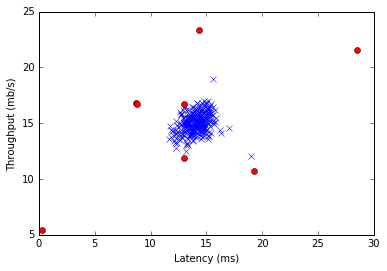

In [65]:
pred = clf.predict(df_train) 
normal = df_train.values[pred == 1]
abnormal = df_train.values[pred == -1]
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')